**IMPORT LIBRARIES**

In [1]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns


**DATA MODELLING**

In [2]:
data = pd.read_csv("social_media_cleaned_scaled.csv")

X = data.drop(columns=["Target"])
y = data["Target"]

# Train-test split(raksesh ftw :))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

**EVALUATION FUNCTION**

In [3]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n Evaluation Metrics for {model_name}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**DECISION TREES**


 Evaluation Metrics for Decision Tree
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000

Confusion Matrix:


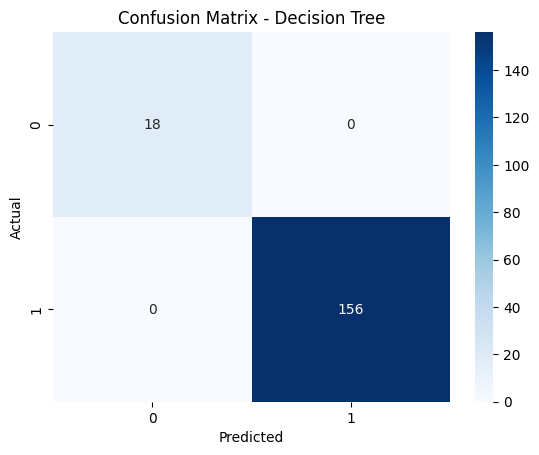

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
dt_preds = dt_model.predict(X_test)

evaluate_model(y_test, dt_preds, "Decision Tree")


**RANDOM FOREST**


 Evaluation Metrics for Random Forest
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000

Confusion Matrix:


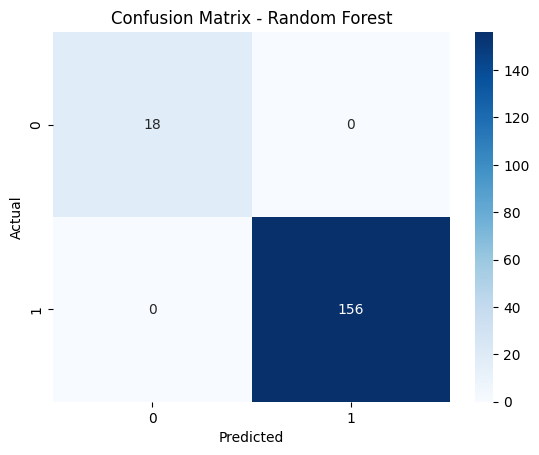

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
rf_preds = rf_model.predict(X_test)

evaluate_model(y_test, rf_preds, "Random Forest")


**XGBOOST**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Evaluation Metrics for XGBoost
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000

Confusion Matrix:


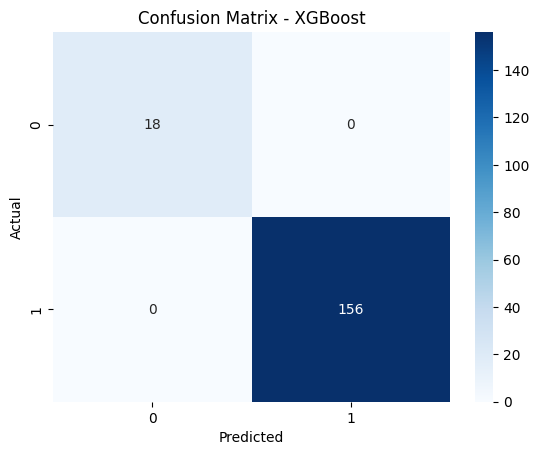

In [6]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_preds = xgb_model.predict(X_test)

evaluate_model(y_test, xgb_preds, "XGBoost")


**SVM**


 Evaluation Metrics for Support Vector Machine
Accuracy  : 0.9195
Precision : 0.9176
Recall    : 1.0000
F1 Score  : 0.9571

Confusion Matrix:


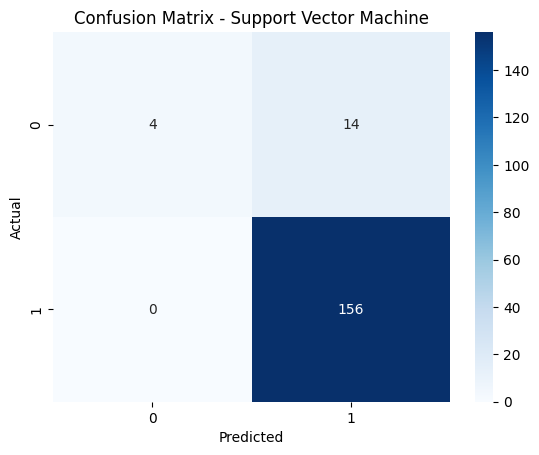

In [7]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

evaluate_model(y_test, svm_preds, "Support Vector Machine")


**LOGISTIC REGRESSION**


 Evaluation Metrics for Logistic Regression
Accuracy  : 0.9655
Precision : 0.9630
Recall    : 1.0000
F1 Score  : 0.9811

Confusion Matrix:


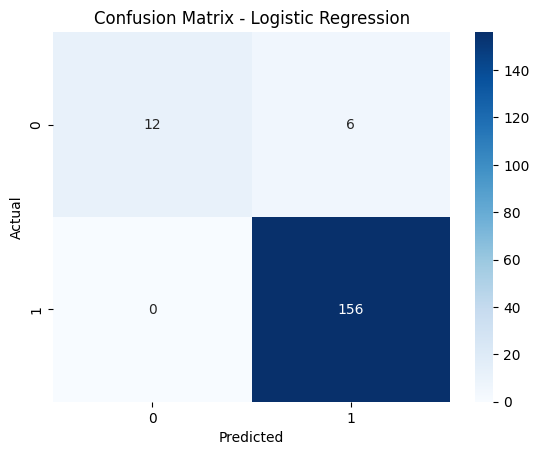

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train, y_train) # Added this line to fit the model

log_reg_preds = log_reg_model.predict(X_test)

evaluate_model(y_test, log_reg_preds, "Logistic Regression")

**LINEAR REGRESSION**


 Evaluation Metrics for Linear Regression
Accuracy  : 0.8966
Precision : 0.8966
Recall    : 1.0000
F1 Score  : 0.9455

Confusion Matrix:


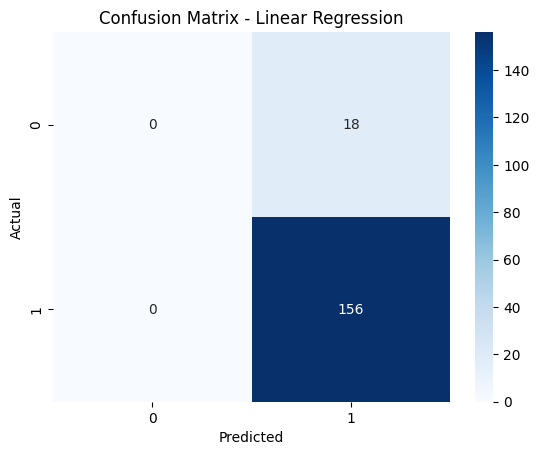

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

lin_reg_preds = (lin_reg_model.predict(X_test) > 0.5).astype(int)

evaluate_model(y_test, lin_reg_preds, "Linear Regression")

**QDA**


 Evaluation Metrics for QDA (Quadratic Discriminant Analysis)
Accuracy  : 0.9253
Precision : 0.9231
Recall    : 1.0000
F1 Score  : 0.9600

Confusion Matrix:


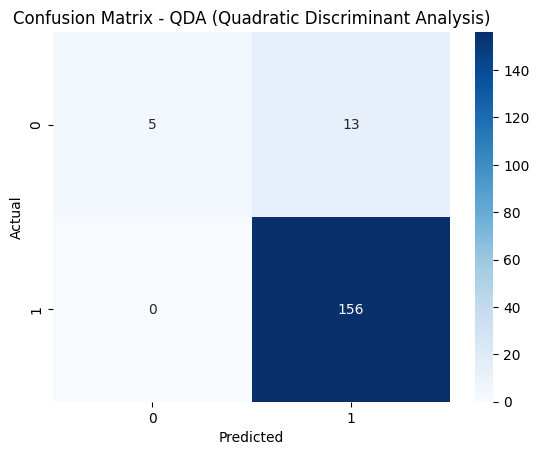

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_preds = qda_model.predict(X_test)

evaluate_model(y_test, qda_preds, "QDA (Quadratic Discriminant Analysis)")

**DUMMY CLASSIFIER**


 Evaluation Metrics for Dummy Classifier (Most Frequent)
Accuracy  : 0.8966
Precision : 0.8966
Recall    : 1.0000
F1 Score  : 0.9455

Confusion Matrix:


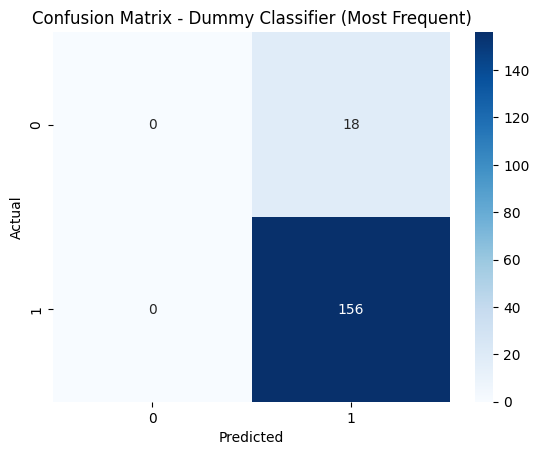

In [11]:
from sklearn.dummy import DummyClassifier

# Strategy can be: "most_frequent", "stratified", "uniform"
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_preds = dummy_model.predict(X_test)

evaluate_model(y_test, dummy_preds, "Dummy Classifier (Most Frequent)")


**SAVE ALL MODELS**

In [12]:
import joblib
joblib.dump(dt_model, "dt.pkl")
joblib.dump(rf_model, "rf.pkl")
joblib.dump(xgb_model, "xgb.pkl")
joblib.dump(svm_model, "svm.pkl")
joblib.dump(log_reg_model, "log_reg.pkl")
joblib.dump(lin_reg_model, "lin_reg.pkl")
joblib.dump(qda_model, "qda.pkl")
joblib.dump(dummy_model, "dummy.pkl")

['dummy.pkl']